Trần Minh Quân
mssv: 20521796
Bài 4

## Import tools

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Get the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bt/data_final.csv')
data.head(10)

,url,host,page_entropy,num_script_tags,script_to_body_ratio,html_length,page_tokens,num_sentences,num_punctuations,distinct_tokens,...,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,dns_record,page_rank,label
0,http://caixa.gov.br/empresa/credito-financiame...,200.201.165.253,5.048844,59,0.089609,175618,5542,982,10792,2140,...,0,0,0,0,0,0,0,0,5,normal
1,http://anandtech.com/show/9199/lg-announces-th...,18.66.97.83,4.655234,20,0.200274,80235,5602,740,7677,2442,...,0,0,0,0,1,0,155,0,6,normal
2,http://ap.org/Content/Press-Release/2013/AP-an...,23.42.164.175,4.889102,27,0.069433,43956,3151,359,5440,1555,...,0,0,0,1,1,0,1952,0,6,normal
3,http://ap.org/Content/AP-In-The-News/2014/AP-n...,23.42.164.175,4.890379,27,0.083729,36451,2109,292,5134,1039,...,0,0,0,1,1,0,1952,0,6,normal
4,http://mylust.com/videos/226488/stunning-young...,172.67.152.14,4.683243,32,0.126247,84596,4530,641,7958,1757,...,0,0,0,0,0,0,608,0,4,normal
5,http://dantri.com.vn/event/may-bay-airasia-cho...,42.113.206.26,5.379526,9,0.131819,125293,4541,2972,21459,2114,...,0,0,0,1,1,1,0,0,5,normal
6,http://ap.org/Content/AP-In-The-News/2014/Lars...,23.42.164.175,4.883465,27,0.084086,36296,2117,288,5068,1024,...,0,0,0,1,1,0,1952,0,6,normal
7,http://ap.org/Content/AP-In-The-News/2013/AP-n...,23.42.164.175,4.894583,27,0.083527,36539,2145,289,5093,1057,...,0,0,0,1,1,0,1952,0,6,normal
8,http://mashable.com/category/twitter/2015/04/2...,104.18.12.9,5.359670,20,0.104074,66635,3625,1281,9380,1579,...,0,0,0,0,0,0,1216,0,7,normal
9,http://ap.org/Content/AP-In-The-News/2013/Form...,23.42.164.175,4.883921,27,0.076972,39651,2707,334,5245,1306,...,0,0,0,1,1,0,1952,0,6,normal


## Node class

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

## Tree class

In [ ]:
class DecisionTreeClassifier:
    def __init__(self, min_samples_split=2, max_depth=2, criterion="entropy"):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.criterion = criterion

    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = np.shape(X)

        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"] > 0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth + 1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth + 1)
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, info_gain=best_split["info_gain"])

        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_info_gain = -float("inf")

        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)

            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    if curr_info_gain > max_info_gain:
                        best_split = {
                            "feature_index": feature_index,
                            "threshold": threshold,
                            "dataset_left": dataset_left,
                            "dataset_right": dataset_right,
                            "info_gain": curr_info_gain
                        }
                        max_info_gain = curr_info_gain

        return best_split

    def split(self, dataset, feature_index, threshold):
        dataset_left = dataset[dataset[:, feature_index] <= threshold]
        dataset_right = dataset[dataset[:, feature_index] > threshold]
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child):
        if self.criterion == "gini":
            gain = self.gini_index(parent) - (len(l_child) / len(parent) * self.gini_index(l_child) +
                                              len(r_child) / len(parent) * self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (len(l_child) / len(parent) * self.entropy(l_child) +
                                           len(r_child) / len(parent) * self.entropy(r_child))
        return gain

    def entropy(self, y):
        class_labels, class_counts = np.unique(y, return_counts=True)
        entropy = 0
        for count in class_counts:
            p_cls = count / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        class_labels, class_counts = np.unique(y, return_counts=True)
        gini = 1
        for count in class_counts:
            p_cls = count / len(y)
            gini -= p_cls ** 2
        return gini

    def calculate_leaf_value(self, Y):
        return np.argmax(np.bincount(Y))

    def fit(self, X, Y):
        dataset = np.column_stack((X.toarray(), Y))
        self.root = self.build_tree(dataset)

    def predict(self, X):
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions

    def make_prediction(self, x, tree):
        if tree.value is not None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

## Train-Test split

In [ ]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

## Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Xác định danh sách các feature numeric và categorical
numeric_features = ['page_entropy', 'num_script_tags', 'script_to_body_ratio', 'html_length',
                    'page_tokens', 'num_sentences', 'num_punctuations', 'distinct_tokens']
categorical_features = ['url', 'host', 'onmouseover', 'right_clic', 'empty_title',
                        'domain_in_title', 'domain_with_copyright', 'whois_registered_domain',
                        'domain_registration_length', 'dns_record', 'page_rank']



# Transformer cho numeric features và categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())  # Scaling cho numeric features
])

# Apply one-hot encoding in the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Specify handle_unknown
])

# Kết hợp các transformer dựa trên danh sách feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Chuyển X_train và X_test thành DataFrame của Pandas
X_train = pd.DataFrame(X_train, columns=data.columns[:-1])
X_test = pd.DataFrame(X_test, columns=data.columns[:-1])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Create and train the DecisionTreeClassifier model

In [ ]:
# Create and train the DecisionTreeClassifier with "entropy" criterion
clf_entropy = DecisionTreeClassifier(min_samples_split=3, max_depth=3, criterion="entropy")
clf_entropy.fit(X_train_processed, Y_train)

# Create and train the DecisionTreeClassifier with "gini" criterion
clf_gini = DecisionTreeClassifier(min_samples_split=3, max_depth=3, criterion="gini")
clf_gini.fit(X_train_processed, Y_train)

In [ ]:
# In cây quyết định sử dụng Entropy
print("Cây quyết định sử dụng Entropy:")
clf_entropy.print_tree()

# In cây quyết định sử dụng Chỉ số Gini
print("Cây quyết định sử dụng Chỉ số Gini:")
clf_gini.print_tree()

## Test the model

In [ ]:
# Make predictions
predictions_entropy = clf_entropy.predict(X_test_processed)
predictions_gini = clf_gini.predict(X_test_processed)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_entropy = accuracy_score(Y_test, predictions_entropy)
accuracy_gini = accuracy_score(Y_test, predictipredictions_gini)

print("Độ chính xác của Cây quyết định với Entropy:", accuracy_entropy)
print("Độ chính xác của Cây quyết định với Chỉ số Gini:", accuracy_gini)

#** ACCURANCY OF ENTROPY AND GINI**

#**COMPARE VS VSM**

In [ ]:
# Trước khi truyền Y cho mô hình, chuyển đổi thành mảng 1 chiều
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

In [ ]:
from sklearn.svm import SVC

# Tạo và huấn luyện mô hình SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, Y_train)

# Dự đoán bằng SVM
Y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print("Độ chính xác của SVM:", accuracy_svm)

Độ chính xác của SVM: 0.9347826086956522


In [ ]:
!pip install matplotlib

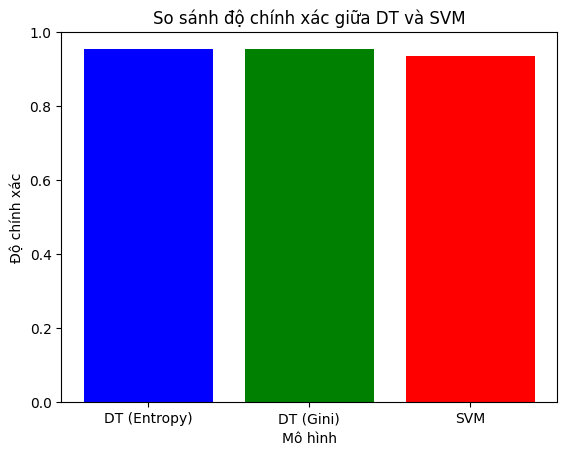

In [ ]:
import matplotlib.pyplot as plt

# Kết quả độ chính xác của DT và SVM
accuracies = [accuracy_entropy, accuracy_gini, accuracy_svm]

# Tên các mô hình
models = ['DT (Entropy)', 'DT (Gini)', 'SVM']

# Vẽ biểu đồ cột
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác')
plt.title('So sánh độ chính xác giữa DT và SVM')
plt.ylim(0, 1)  # Điều chỉnh giới hạn trục y nếu cần thiết
plt.show()